# EDA

In [1]:
%load_ext watermark

In [2]:
%watermark -v -m -p numpy,pandas,sklearn,seaborn,matplotlib -g

/home/hades/anaconda3/envs/test101/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


CPython 3.7.3
IPython 7.9.0

numpy 1.18.1
pandas 1.0.3
sklearn 0.22.1
seaborn 0.9.0
matplotlib 3.1.1

compiler   : GCC 7.3.0
system     : Linux
release    : 4.4.0-18362-Microsoft
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit
Git hash   : d6d2abf36553a18c1d1f83b7130ffa115f4a06fe


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

In [4]:
# Random Seed
SEED = 61
np.random.seed = SEED

In [5]:
dataurl = '../datasets/high_diamond_ranked_10min.csv'

In [6]:
df = pd.read_csv(dataurl)
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [7]:
print('Shape of Data, # of Rows {} and # of Columns {}'.format(df.shape[0], df.shape[1]))

Shape of Data, # of Rows 9879 and # of Columns 40


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [9]:
df.iloc[:, 2:20].columns

Index(['blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood', 'blueKills',
       'blueDeaths', 'blueAssists', 'blueEliteMonsters', 'blueDragons',
       'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin'],
      dtype='object')

In [10]:
df.iloc[:, 21:].columns

Index(['redWardsPlaced', 'redWardsDestroyed', 'redFirstBlood', 'redKills',
       'redDeaths', 'redAssists', 'redEliteMonsters', 'redDragons',
       'redHeralds', 'redTowersDestroyed', 'redTotalGold', 'redAvgLevel',
       'redTotalExperience', 'redTotalMinionsKilled',
       'redTotalJungleMinionsKilled', 'redGoldDiff', 'redExperienceDiff',
       'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

The data is found on Kaggle. The data set contained 9879 observations with 40 features. there are 19 features per team as indicated above. 

Data Source: https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min

*Checking gameid uniqueness to acertain all games are independent.*

In [11]:
len(df['gameId'].unique()) == df.shape[0]

True

*Distribution of wins*

In [12]:
df['blueWins'].value_counts()

0    4949
1    4930
Name: blueWins, dtype: int64

blueWins is our target variable, we want to make sure the data is balanced.

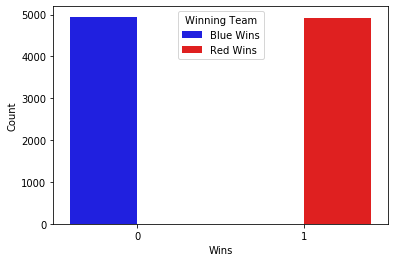

In [13]:
ax = sns.countplot(df['blueWins'], hue=df['blueWins'], palette=['blue', 'red'])
ax.set(xlabel='Wins', ylabel='Count')
ax.legend(title='Winning Team', loc='upper center', labels=['Blue Wins', 'Red Wins'])

## Data Cleaning

*Dropping `gameId` since it is a unique value for each observation.*

In [14]:
df = df.drop(columns='gameId')
corr = df.corr()

#### Checking correlation between features

In [16]:
columns = df.columns
for i in columns:
    for j in columns:
        if abs(df[i].corr(df[j])) >= 0.95:
            if i != j:
                print([i, j, df[i].corr(df[j])])
                columns = columns.drop(i)

['blueFirstBlood', 'redFirstBlood', -1.0]
['blueKills', 'redDeaths', 1.0]
['blueDeaths', 'redKills', 1.0]
['blueTotalGold', 'blueGoldPerMin', 1.0]
['blueTotalMinionsKilled', 'blueCSPerMin', 1.0]
['blueGoldDiff', 'redGoldDiff', -1.0]
['blueExperienceDiff', 'redExperienceDiff', -1.0]
['redTotalGold', 'redGoldPerMin', 1.0]
['redTotalMinionsKilled', 'redCSPerMin', 0.9999999999999996]


In [20]:
print((df['blueKills'] == df['redDeaths']).value_counts())
print((df['blueDeaths'] == df['redKills']).value_counts())
print((df['redTotalGold'] / 10 == df['redGoldPerMin']).value_counts())
print((df['blueTotalGold'] / 10 == df['blueGoldPerMin']).value_counts())
print((df['redTotalMinionsKilled'] / 10 == df['redCSPerMin']).value_counts())
print((df['blueTotalMinionsKilled'] / 10 == df['blueCSPerMin']).value_counts())
print((df['redEliteMonsters'] == (df['redDragons'] + df['redHeralds'])).value_counts())
print((df['blueEliteMonsters'] == (df['blueDragons'] + df['blueHeralds'])).value_counts())
print((df['blueGoldDiff'] == (df['blueTotalGold'] - df['redTotalGold'])).value_counts())
print((df['redGoldDiff'] == (df['redTotalGold'] - df['blueTotalGold'])).value_counts())
print((df['blueExperienceDiff'] == (df['blueTotalExperience'] - df['redTotalExperience'])).value_counts())
print((df['redExperienceDiff'] == (df['redTotalExperience'] - df['blueTotalExperience'])).value_counts())

True    9879
dtype: int64
True    9879
dtype: int64
True    9879
dtype: int64
True    9879
dtype: int64


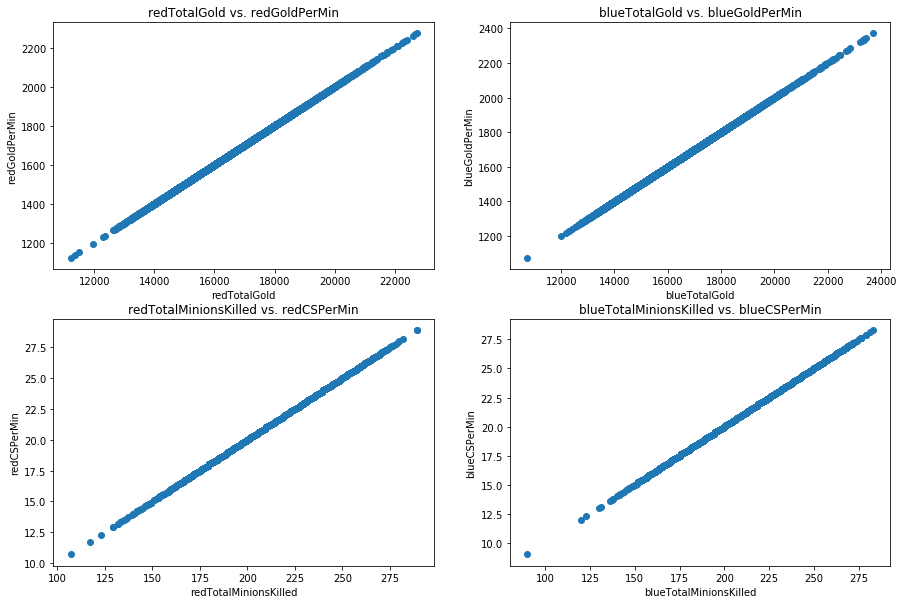

In [21]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))


ax[0,0].scatter('redTotalGold','redGoldPerMin', data=df)
ax[0,0].set_title('redTotalGold vs. redGoldPerMin')
ax[0,0].set_ylabel('redGoldPerMin')
ax[0,0].set_xlabel('redTotalGold')

ax[0,1].scatter('blueTotalGold','blueGoldPerMin', data=df)
ax[0,1].set_title('blueTotalGold vs. blueGoldPerMin')
ax[0,1].set_ylabel('blueGoldPerMin')
ax[0,1].set_xlabel('blueTotalGold')

ax[1,0].scatter('redTotalMinionsKilled','redCSPerMin', data=df)
ax[1,0].set_title('redTotalMinionsKilled vs. redCSPerMin')
ax[1,0].set_ylabel('redCSPerMin')
ax[1,0].set_xlabel('redTotalMinionsKilled')

ax[1,1].scatter('blueTotalMinionsKilled','blueCSPerMin', data=df)
ax[1,1].set_title('blueTotalMinionsKilled vs. blueCSPerMin')
ax[1,1].set_ylabel('blueCSPerMin')
ax[1,1].set_xlabel('blueTotalMinionsKilled')

plt.show()

*Dealing with features with high correlation*
- `blueFirstBlood` and `redFirstBlood` are inversely correlated since only one team can score first blood in the game. Dropping one feature
- `blueKills` and `redDeaths`, and `blueDeaths` and `redKills` are perfectly correlated and have same data since the game is only between two teams.
- `redCSPerMin`, `redGoldPerMin`, `redExperienceDiff`, `redGoldDiff`, `blueGoldDiff`, `blueCSPerMin`, `blueExperienceDiff`, `redEliteMonsters`, `blueEliteMonsters` and `blueGoldPerMin`, are all derived values

In [24]:
df = df.drop(columns=['redFirstBlood', 'redDeaths', 'redKills', 'redGoldPerMin', 'blueGoldPerMin', 'redCSPerMin', 'blueCSPerMin', 'blueGoldDiff', 'redGoldDiff', 'blueExperienceDiff', 'redExperienceDiff', 'redEliteMonsters', 'blueEliteMonsters'])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   blueWins                      9879 non-null   int64  
 1   blueWardsPlaced               9879 non-null   int64  
 2   blueWardsDestroyed            9879 non-null   int64  
 3   blueFirstBlood                9879 non-null   int64  
 4   blueKills                     9879 non-null   int64  
 5   blueDeaths                    9879 non-null   int64  
 6   blueAssists                   9879 non-null   int64  
 7   blueDragons                   9879 non-null   int64  
 8   blueHeralds                   9879 non-null   int64  
 9   blueTowersDestroyed           9879 non-null   int64  
 10  blueTotalGold                 9879 non-null   int64  
 11  blueAvgLevel                  9879 non-null   float64
 12  blueTotalExperience           9879 non-null   int64  
 13  blu

In [26]:
clean_corr = df.corr()
clean_corr['blueWins'].sort_values(ascending=False)

blueWins                        1.000000
blueTotalGold                   0.417213
blueTotalExperience             0.396141
blueAvgLevel                    0.357820
blueKills                       0.337358
blueAssists                     0.276685
blueTotalMinionsKilled          0.224909
blueDragons                     0.213768
blueFirstBlood                  0.201769
blueTotalJungleMinionsKilled    0.131445
blueTowersDestroyed             0.115566
blueHeralds                     0.092385
blueWardsDestroyed              0.044247
blueWardsPlaced                 0.000087
redWardsPlaced                 -0.023671
redWardsDestroyed              -0.055400
redHeralds                     -0.097172
redTowersDestroyed             -0.103696
redTotalJungleMinionsKilled    -0.110994
redDragons                     -0.209516
redTotalMinionsKilled          -0.212171
redAssists                     -0.271047
blueDeaths                     -0.339297
redAvgLevel                    -0.352127
redTotalExperien

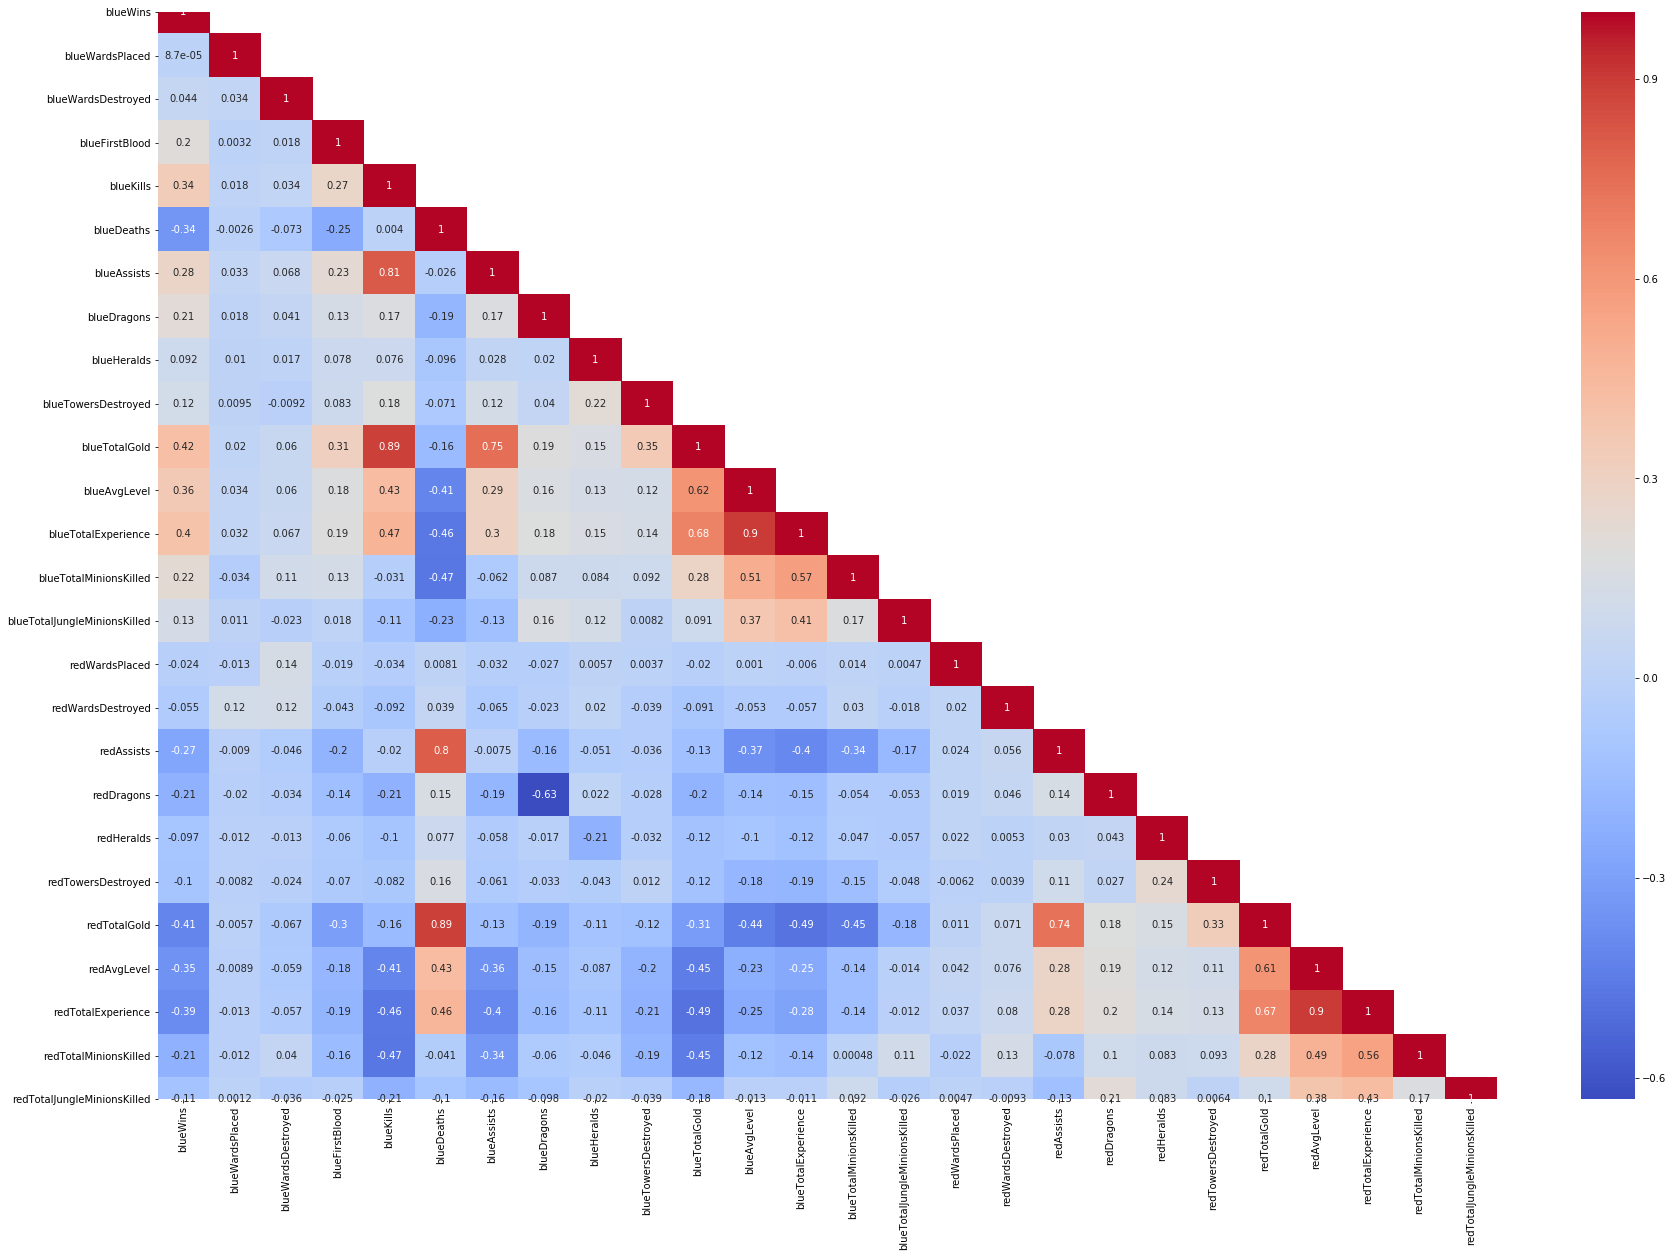

In [27]:
f, ax = plt.subplots(figsize= (30, 20))
lower = clean_corr.where(np.tril(np.ones(clean_corr.shape)).astype(np.bool))
hmap=sns.heatmap(lower,cmap="coolwarm", annot=True)
plt.savefig('clean-corr-half.png')

['blueTotalGold' , 'blueTotalExperience', blueAvgLevel, 'blueKills', 'blueAssists', 'blueTotalMinionsKilled', 'blueDragons', 'blueFirstBlood'], those feature have more higher
corrlation than other features with blueWins

### Identify Missing Data

In [28]:
df.describe()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,...,redWardsDestroyed,redAssists,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.361980,0.187974,0.051422,...,2.723150,6.662112,0.413098,0.160036,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088
std,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.480597,0.390712,0.244369,...,2.138356,4.060612,0.492415,0.366658,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885
min,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000
25%,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,...,1.000000,4.000000,0.000000,0.000000,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000
50%,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,...,2.000000,6.000000,0.000000,0.000000,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000
75%,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,0.000000,0.000000,...,4.000000,9.000000,1.000000,0.000000,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000
max,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,1.000000,1.000000,4.000000,...,24.000000,28.000000,1.000000,1.000000,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000


In [29]:
df.isnull().sum().sum()

0

In [30]:
df.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,...,redWardsDestroyed,redAssists,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled
0,0,28,2,1,9,6,11,0,0,0,...,6,8,0,0,0,16567,6.8,17047,197,55
1,0,12,1,0,5,5,5,0,0,0,...,1,2,1,1,1,17620,6.8,17438,240,52
2,0,15,0,0,7,11,4,1,0,0,...,3,14,0,0,0,17285,6.8,17254,203,28
3,0,43,1,0,4,5,5,0,1,0,...,2,10,0,0,0,16478,7.0,17961,235,47
4,0,75,4,0,6,6,6,0,0,0,...,2,7,1,0,0,17404,7.0,18313,225,67


In [31]:
df.applymap(np.isreal).all().sum()

26

In [32]:
df.applymap(lambda x: isinstance(x, (int, float))).all().sum()

26

For missing value, first see use df.describe() to see min/max in each columns. ensure each feature in right range. Then, we use df.isnull() to see pandas that can identify any missing value. Since our data contain all numeric features. we also use applymap function with np.isreal or isinstance, search for each row and each column to see if there any missing value can find. Base on the result, our data do not have any missing values.

In [35]:
print('Lenght of columms {}'.format(len(df.columns)))

Lenght of columms 26


In [36]:
df.columns

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'redWardsPlaced', 'redWardsDestroyed',
       'redAssists', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled'],
      dtype='object')

### Outliers

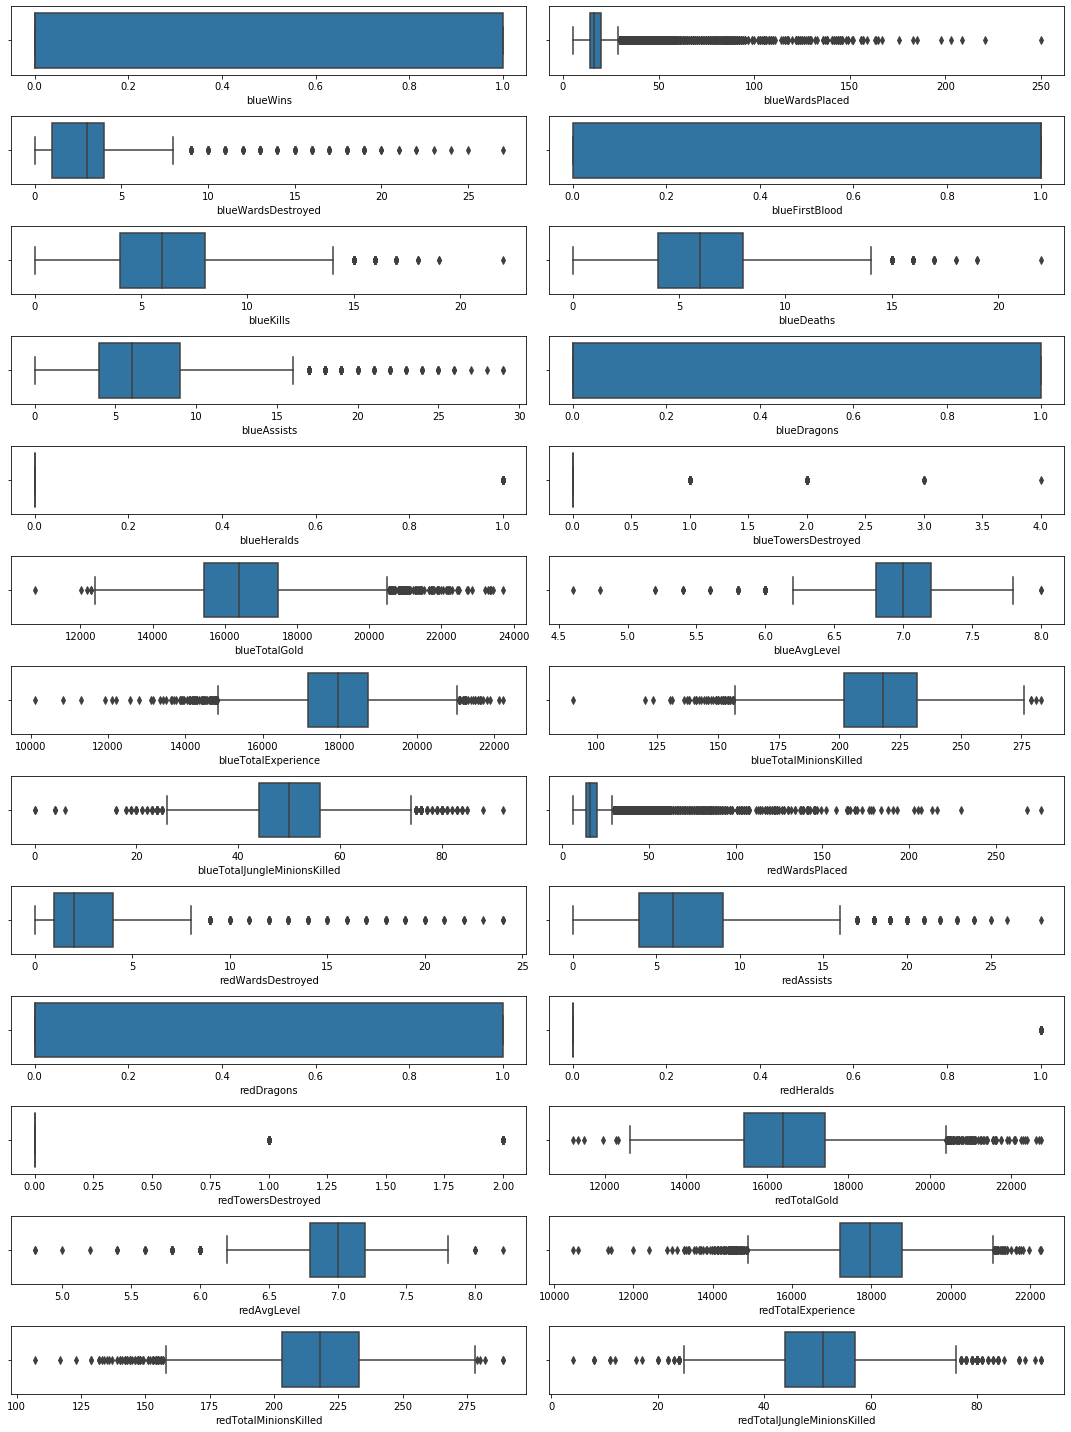

In [43]:
columns = df.columns

row = (len(columns)/2)
plt.figure(figsize = (15, 20))

for i, col in enumerate(columns):
    plt.subplot(row, 2, i +1)
    sns.boxplot(df[col])

plt.tight_layout()

our data contain outliers. but since those are about game performance for each group. like red group performed well in one game, but performance bad in other games. we decide to keep those outliers since there is no unit. and these outliers could better give feedback on which team will win the game.

# Split data

In [45]:
y = df['blueWins']
X = df.loc[:, df.columns != 'blueWins']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=SEED)

test_df = pd.concat([X_test, y_test], axis=1)
train_df = pd.concat([X_train, y_train], axis=1)

train_df.to_csv('../datasets/train.csv', index=False)
test_df.to_csv('../datasets/test.csv', index = False)

print('Labels count in y: ', np.bincount(y))
print('Labels count in y_train ', np.bincount(y_train))
print('Labels count in y_test', np.bincount(y_test))

The data has been split into training and testing set. The training data contain 6915 observations and the test data contain 2964 observations. we also use stratify=y to eunsures that both training and test datasets have the same class proportions as the original dataset.
